/home/james/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


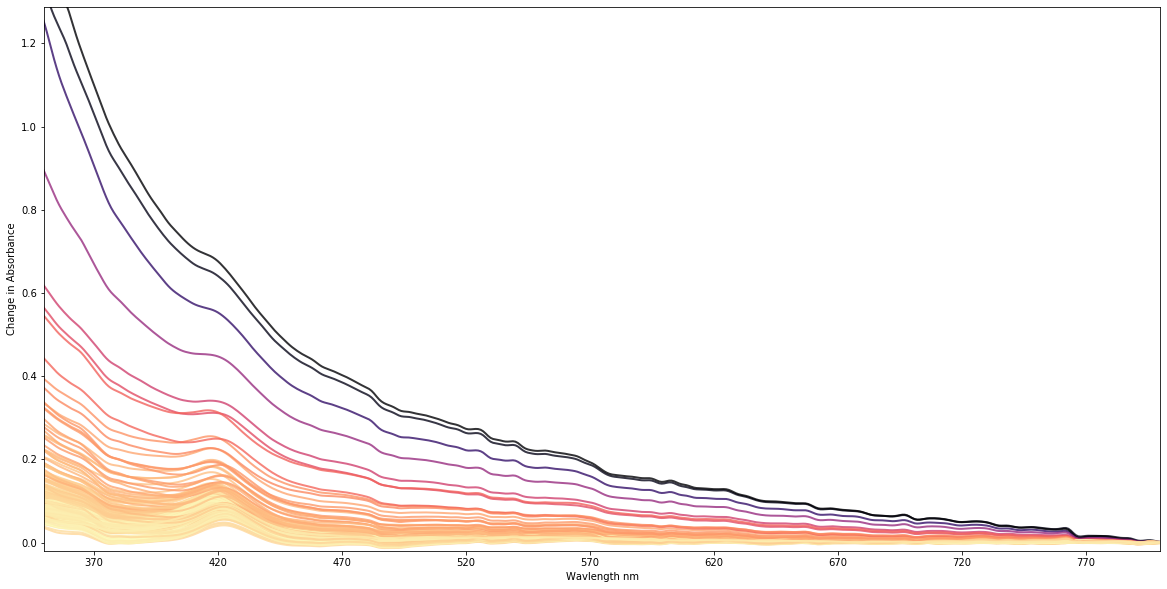

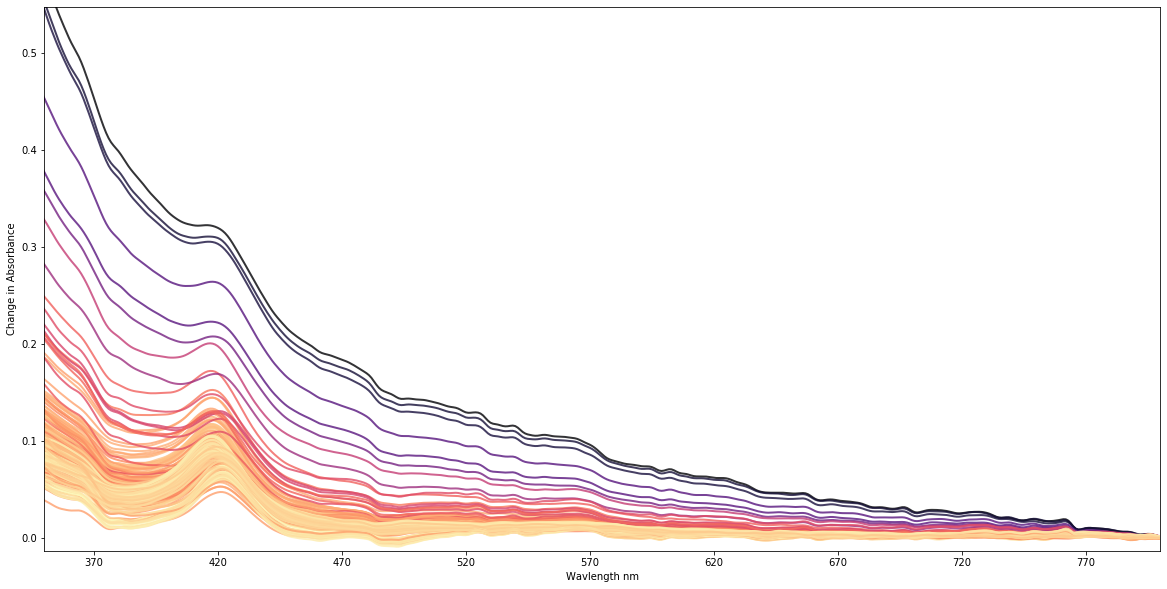

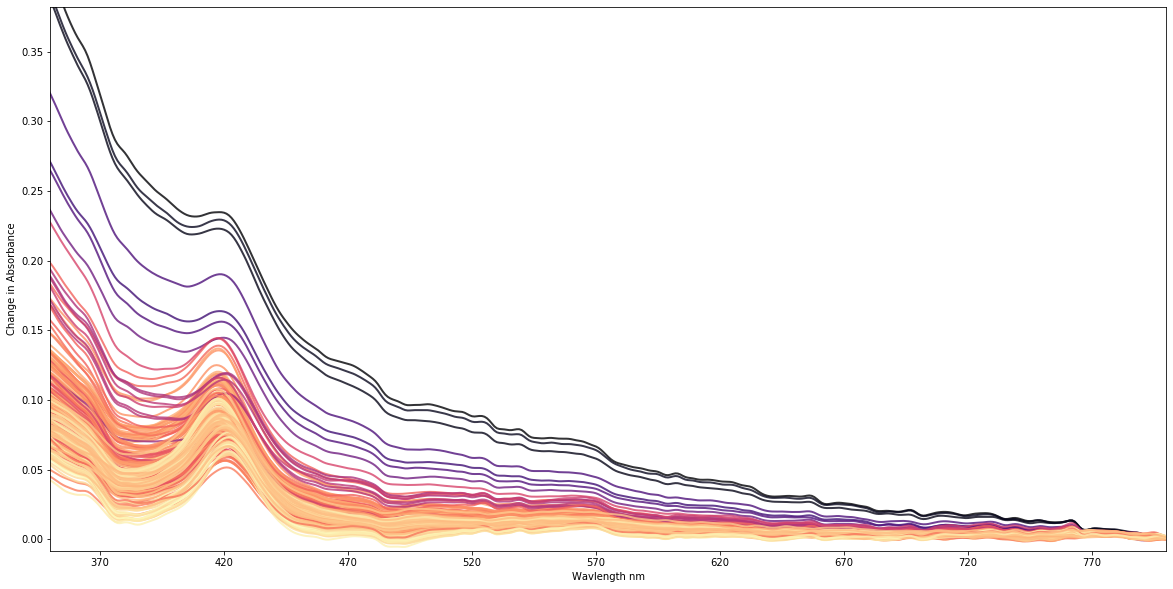

In [11]:
import pandas as pd
import numpy as np
from PlateAnalysis_Buffers import PlateDataset
import matplotlib.pyplot as plt

design = pd.read_csv('ResponseSurfaceDesign.csv',index_col=0)
plate_t0 = PlateDataset('20191111_BufferResponseSurface_dryRun_t0.CSV')
plate_t1 = PlateDataset('20191111_BufferResponseSurface_dryRun_t1.CSV')
plate_t2 = PlateDataset('20191111_BufferResponseSurface_dryRun_t2.CSV')

plate_t0.PlotTrace(range(1,21),colors = True)
plate_t1.PlotTrace(range(1,21),colors = True)
plate_t2.PlotTrace(range(1,21),colors = True)

In [12]:
import re
data = pd.DataFrame([],columns = ['Triton  / %', 'DMSO /%', \
                                  'Arginine / mM', 'BSA /mg/ml',\
                                  'Time','Signal to Noise'])

def GetConditionsFromPlate(Plate,Design):
    output = pd.DataFrame([],columns = ['Triton  / %', 'DMSO /%', \
                                      'Arginine / mM', 'BSA /mg/ml',\
                                      'Time','Signal to Noise'])
    for i in range(len(Design)):
        col1, col2 = (i*2)+1, (i*2)+2
        s2n1 = Plate.GetCols(col1).loc[:,405]# - Plate.GetCols(col1).loc[:,390]
        s2n2 = Plate.GetCols(col2).loc[:,405]# - Plate.GetCols(col2).loc[:,390]
        s2n = s2n1.append(s2n2) # both columns
        for j in s2n:
            conditions = Design.loc[[i],:]

            t = Plate.metadata.iloc[0,2]
            t = re.search(r'\d\d:\d\d:\d\d',t)[0]
            conditions['Time']   = t
            conditions['Signal to Noise']  = j
            output = output.append(conditions)
    return output.reset_index(drop=True)

data = GetConditionsFromPlate(plate_t0,design)
data = data.append(GetConditionsFromPlate(plate_t1,design))
data = data.append(GetConditionsFromPlate(plate_t2,design))
data.reset_index(inplace=True,drop=True)
data

,Triton / %,DMSO /%,Arginine / mM,BSA /mg/ml,Time,Signal to Noise
0,0.1,0.0,0.0,0.00,15:57:32,0.062
1,0.1,0.0,0.0,0.00,15:57:32,0.070
2,0.1,0.0,0.0,0.00,15:57:32,0.073
3,0.1,0.0,0.0,0.00,15:57:32,0.096
4,0.1,0.0,0.0,0.00,15:57:32,0.077
5,0.1,0.0,0.0,0.00,15:57:32,0.080
6,0.1,0.0,0.0,0.00,15:57:32,0.078
7,0.1,0.0,0.0,0.00,15:57:32,0.075
8,0.1,0.0,0.0,0.00,15:57:32,0.083
9,0.1,0.0,0.0,0.00,15:57:32,0.086


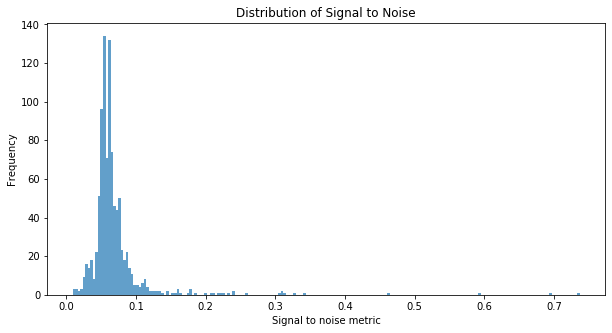

In [13]:
plt.figure(figsize = (10,5))
plt.hist(data['Signal to Noise'], bins = 200, alpha = 0.7)
plt.title('Distribution of Signal to Noise')
plt.xlabel('Signal to noise metric')
plt.ylabel('Frequency')
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import torch
import torch.nn as nn

# Splititing X and Y
x = data.loc[:,['Triton  / %', 'DMSO /%', 'Arginine / mM', 'BSA /mg/ml','Time']]
y = data[['Signal to Noise']]

# Calculating time between experiments
t = pd.to_datetime(x['Time']) - pd.to_datetime(x['Time']).min()
t = t.dt.total_seconds()
x['t'] = t

x = x[['Triton  / %', 'DMSO /%', 'Arginine / mM', 'BSA /mg/ml','t']]
# Polynomials!
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x)


#scaling 

scaler = MinMaxScaler(feature_range=(0, 1))
stdscaler = StandardScaler()

x_poly = scaler.fit_transform(x_poly)
y = scaler.fit_transform(y)

   
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.33)

# make into tensors
x_train, x_test, y_train, y_test = torch.tensor(x_train,dtype=torch.float),\
torch.tensor(x_test,dtype=torch.float), \
torch.tensor(y_train,dtype=torch.float), \
torch.tensor(y_test,dtype=torch.float)

100%|██████████| 500/500 [00:02<00:00, 168.07it/s]


Training loss = 0.0002


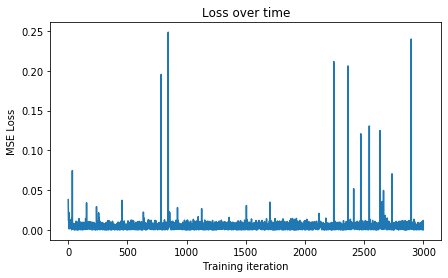

Test loss = 0.0015


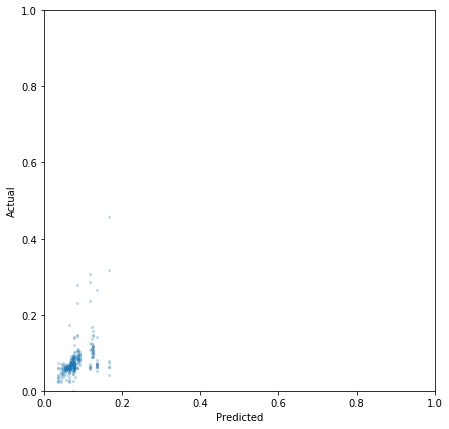

Weights:


,1,x0,x1,x2,x3,x4,x0^2,x0 x1,x0 x2,x0 x3,...,x1^2,x1 x2,x1 x3,x1 x4,x2^2,x2 x3,x2 x4,x3^2,x3 x4,x4^2
0,-0.195805,0.017972,0.020696,0.162776,-0.005174,-0.075671,0.068529,0.006709,-0.03189,0.020568,...,0.105024,-0.044993,0.022498,0.062391,0.004522,-0.038451,0.011082,0.088842,0.053886,0.013916


In [23]:
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm


class dataset(Dataset):
    def __init__(self, x,y):
        self.x = x
        self.y = y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.x.shape[0]
    
    
train_loader = DataLoader(dataset=dataset(x_train,y_train),
                          batch_size=128,
                          shuffle=True,
                          num_workers=0)


polymodel = nn.Linear(x_train.shape[1],1,bias = False)
opt = torch.optim.Adam(polymodel.parameters(),lr = 1e-2)
loss_fn = nn.MSELoss()
lossrecord = []

for epoch in tqdm(range(500)):
    for i, batch in enumerate(train_loader, 0):
        x_,y_ = batch
        yhat = polymodel.forward(x_)
        loss = loss_fn(y_,yhat)
        loss.backward()
        opt.step()
        opt.zero_grad()

        lossrecord.append(loss.item())

print(f'Training loss = {round(loss.item(),4)}')

plt.figure(figsize = (7,4))
plt.plot(np.array(lossrecord))
plt.title('Loss over time')
plt.xlabel('Training iteration')
plt.ylabel('MSE Loss')
plt.show()

yhat = polymodel.forward(x_test)
err = loss_fn(y_test,yhat)
print(f'Test loss = {round(err.item(),4)}')

plt.figure(figsize=(7,7))
plt.scatter(yhat.detach(),y_test.detach(),alpha = 0.2, s =5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()


print('Weights:')
poly_weights = pd.DataFrame(polymodel.weight.detach().numpy(),columns = poly.get_feature_names())
poly_weights

In [24]:
poly_columns = design.columns.tolist()
poly_columns.append('Time')
FactorNames = dict(zip(['x'+str(i) for i in range(10)],poly_columns))

PolyFactors = poly_weights.transpose()
PolyFactors.index = pd.Series(PolyFactors.index).replace(FactorNames,regex=True)
PolyFactors = PolyFactors.sort_values([0],ascending = False)
PolyFactors

,0
Arginine / mM,0.162776
DMSO /%^2,0.105024
BSA /mg/ml^2,0.088842
Triton / %^2,0.068529
Triton / % Time,0.067502
DMSO /% Time,0.062391
BSA /mg/ml Time,0.053886
DMSO /% BSA /mg/ml,0.022498
DMSO /%,0.020696
Triton / % BSA /mg/ml,0.020568


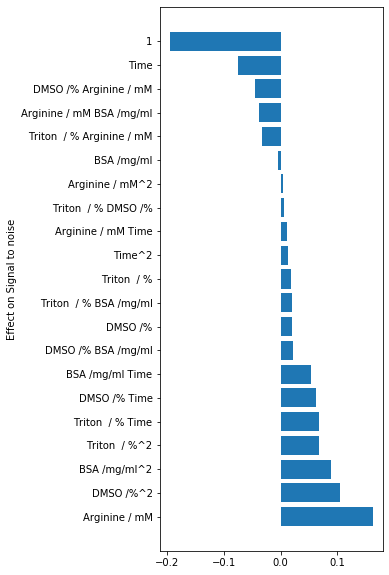

In [25]:
plt.figure(figsize = (4,10))
plt.barh(PolyFactors.index,PolyFactors.loc[:,0])
plt.ylabel('Effect on Signal to noise')
plt.show()

### Some of the peaks are at 420 - 422 nm, which might mean a type 2 shift from the buffers

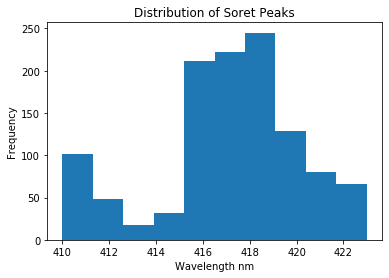

In [8]:
all_data = plate_t0.data
all_data = all_data.append(plate_t1.data)
all_data = all_data.append(plate_t2.data)

plt.hist(all_data.loc[:,410:430].idxmax(axis=1),bins=10)
plt.xlabel('Wavelength nm')
plt.ylabel('Frequency')
plt.title('Distribution of Soret Peaks')
plt.show()

100%|██████████| 100/100 [00:00<00:00, 139.01it/s]


Training loss = 0.0058


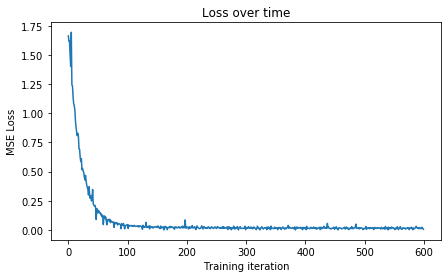

Test loss = 0.0121


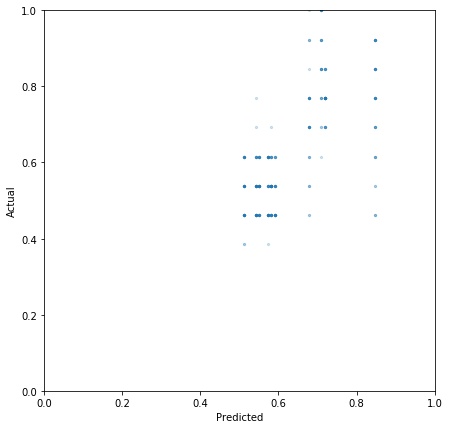

Weights:
   Triton  / %   DMSO /%  Arginine / mM  BSA /mg/ml
0     0.043366 -0.035885       0.300336    0.025183
Bias:
Parameter containing:
tensor([0.5469], requires_grad=True)


,Triton / %,DMSO /%,Arginine / mM,BSA /mg/ml
0,0.043366,-0.035885,0.300336,0.025183


In [9]:
def GetSoretShiftAndConditionsFromPlate(Plate,Design):
    output = pd.DataFrame([],columns = ['Triton  / %', 'DMSO /%', \
                                      'Arginine / mM', 'BSA /mg/ml',\
                                      'Soret Peak'])
    for i in range(len(Design)):
        col1, col2 = (i*2)+1, (i*2)+2
        Soret1 = Plate.GetCols(col1).loc[:,410:430].idxmax(axis=1)
        Soret2 = Plate.GetCols(col2).loc[:,410:430].idxmax(axis=1)
        Soret = Soret1.append(Soret2) # both columns
        for j in Soret:
            conditions = Design.loc[[i],:]
            conditions['Soret Peak']  = j#-418 # so that 0 is the sweet spot
            output = output.append(conditions)
    return output.reset_index(drop=True)

SoretShiftData = GetSoretShiftAndConditionsFromPlate(plate_t0,design)
SoretShiftData = SoretShiftData.append(GetSoretShiftAndConditionsFromPlate(plate_t1,design))
SoretShiftData = SoretShiftData.append(GetSoretShiftAndConditionsFromPlate(plate_t2,design))
SoretShiftData.reset_index(inplace=True,drop=True)

Soretx = SoretShiftData.loc[:,['Triton  / %', 'DMSO /%', 'Arginine / mM', 'BSA /mg/ml']]
Sorety = SoretShiftData[['Soret Peak']]

# Polynomials!
#poly = PolynomialFeatures(2)
#Soretx = poly.fit_transform(Soretx)

#scaling 

scaler = MinMaxScaler(feature_range=(0, 1))

Soretx = scaler.fit_transform(Soretx)
Sorety = scaler.fit_transform(Sorety)

   
# Train test split
Soret_x_train, Soret_x_test, Soret_y_train, Soret_y_test = train_test_split(Soretx, Sorety, test_size=0.33)

# make into tensors
Soret_x_train, Soret_x_test, Soret_y_train, Soret_y_test = torch.tensor(Soret_x_train,dtype=torch.float),\
torch.tensor(Soret_x_test,dtype=torch.float), \
torch.tensor(Soret_y_train,dtype=torch.float), \
torch.tensor(Soret_y_test,dtype=torch.float)

    
Soret_train_loader = DataLoader(dataset=dataset(Soret_x_train,Soret_y_train),
                          batch_size=128,
                          shuffle=True,
                          num_workers=0)


Soretmodel = nn.Linear(Soret_x_train.shape[1],1,bias = True)
opt = torch.optim.SGD(Soretmodel.parameters(),lr = 1e-2)
loss_fn = nn.MSELoss()
lossrecord = []

for epoch in tqdm(range(100)):
    for i, batch in enumerate(Soret_train_loader, 0):
        x_,y_ = batch
        yhat = Soretmodel.forward(x_)
        loss = loss_fn(y_,yhat)
        loss.backward()
        opt.step()
        opt.zero_grad()

        lossrecord.append(loss.item())

print(f'Training loss = {round(loss.item(),4)}')

plt.figure(figsize = (7,4))
plt.plot(np.array(lossrecord))
plt.title('Loss over time')
plt.xlabel('Training iteration')
plt.ylabel('MSE Loss')
plt.show()

yhat = Soretmodel.forward(Soret_x_test)
err = loss_fn(Soret_y_test,yhat)
print(f'Test loss = {round(err.item(),4)}')

plt.figure(figsize=(7,7))
plt.scatter(yhat.detach(),Soret_y_test.detach(),alpha = 0.2, s =5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()


print('Weights:')
Soret_weights = pd.DataFrame(Soretmodel.weight.detach().numpy(),\
                             columns = ['Triton  / %', 'DMSO /%', 'Arginine / mM', 'BSA /mg/ml'])
print(Soret_weights)
print('Bias:')
print(Soretmodel.bias)

Soret_weights


## Looks like arginine causes the type II shift

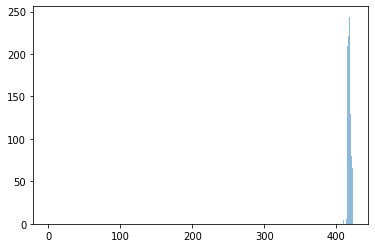

In [10]:
plt.hist(SoretShiftData['Soret Peak'],alpha = 0.5,bins=10)
plt.hist(Sorety,bins=10)
plt.show()